In [116]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci

# Import Data

In [117]:
# import measured data from file, make DataFrame
with np.load("messwerte.npz") as file:
    u_a = pd.DataFrame({"time" : file["t_mess"], "measured" : file["u_a_mess"]})

# calculate datapoints
RESISTOR=20
COIL=9e-3
CAPACITOR=1000e-6
VOLTAGE = 2
numerator=[1/(RESISTOR*CAPACITOR), 0]
denominator=[1, 1/(RESISTOR*CAPACITOR), 1/(COIL*CAPACITOR)]

system=signal.lti(numerator, denominator)
calculated=VOLTAGE*sci.signal.step(system, T=u_a["time"])[1]

# append dataframe
u_a["calculated"] = calculated 

# Analysis

In [118]:
def mean_root_error(calculated, measured): 
    # Calculate the root mean square error of 2 1D arrays
    return np.round(np.square(np.subtract(measured, calculated)), 8).sum() *10**6

# 
mre = mean_root_error(u_a["calculated"], u_a["measured"])
print(f"Quadratische Fehlersumme mit Nennwerten: {mre} e-6")


COIL_LOWER = 7e-3
COIL_UPPER = 12e-3
CAPACITOR_LOWER = 9 * 100e-6
CAPACITOR_UPPER = 16 * 100e-6
STEPS = 50
xlist = np.linspace(COIL_LOWER, COIL_UPPER, STEPS)
ylist = np.linspace(CAPACITOR_LOWER, CAPACITOR_UPPER, STEPS) 
x, y = np.meshgrid(xlist, ylist)

Z = mean_root_error(x,y)
# plt.contourf(x, y, Z)
plt.show()

# Z_min = sci.optimize.minimize(mean_root_error, x0=[0.1**3, 0.1**2])

Quadratische Fehlersumme mit Nennwerten: 2116333.16 e-6


# Plotting

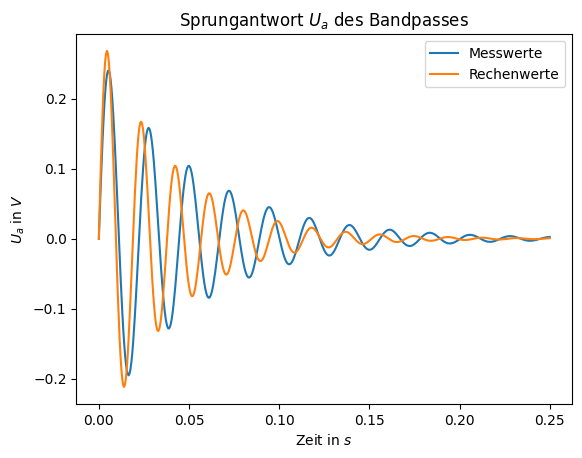

In [119]:
plt.plot(u_a["time"], u_a["measured"], label="Messwerte")
plt.plot(u_a["time"], u_a["calculated"], label='Rechenwerte')

plt.title("Sprungantwort $U_a$ des Bandpasses")
plt.xlabel("Zeit in $s$")
plt.ylabel("$U_a$ in $V$")
plt.legend()

# plt.contourf(x, y, Z)

# ax = plt.figure().add_subplot(projection='3d')
# ax.contour(x, y, Z, extend3d=True)

plt.show()